## Statistics Game Logo (R) - Ethan, Molly, and Ian

In the following cells, a logo for our game, `[GAME NAME]`, will be created.

### 1.0 - Install and Load the Necessary Packages
We use `ggplot2` and `dplyr` from `tidyverse`, as well as `geomtextpath`.

*Note: we should confirm with Kalim in-person if it is alright to install `geomtextpath`.*

In [1]:
# Install and load the libraries
install.packages(c('tidyverse', 'geomtextpath'), repos='https://cran.microsoft.com')

library(ggplot2)
library(dplyr)
library(geomtextpath)


The downloaded binary packages are in
	/var/folders/l9/8g551h096y907y3n7bkvnll40000gp/T//RtmpKh0x6z/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 2.0 - Create Plot Data Vectors
This is where the main pattern data is created (this will of course be adjusted!).

In [2]:
# Define the number of points
points <- 2000

# Define the angle
angle <- pi/2 + 0.001

# Spiral dataset
t <- (1:points) * angle
x_spiral <- cos(t)
y_spiral <- sin(t)

# Half-circle dataset (adjust!)
r <- 2000
x_circle <- seq(-r, r)
y_circle <- sqrt(r^2 - x_circle^2)

# Parabola top section dataset
x_par <- -18:18
y_par <- -x_par^2 + 324
x_par <- x_par * 35

# NEED BOTTOM OF EYE

# Create dataframes
spiral <- data.frame(t, x_spiral, y_spiral)
circle <- data.frame(x_circle, y_circle)
parabola <- data.frame(x_par, y_par)

### 2.1 - Create Theme Object to Remove Unwanted Plot Features
This code stores the removal information for the plot in a `theme()` object for later use. <br>
The object sets the background to white, and removes the grid, ticks, text, and titles.

In [3]:
# Object containing plot theme settings to remove axes, labels, etc.
remove_axes <- theme(panel.background = element_rect(fill='white'),
                     panel.grid = element_blank(),
                     axis.ticks = element_blank(),
                     axis.title = element_blank(),
                     axis.text = element_blank())

### 2.2 - Create Plot
This is an exapmle and will also get heavily adjusted.

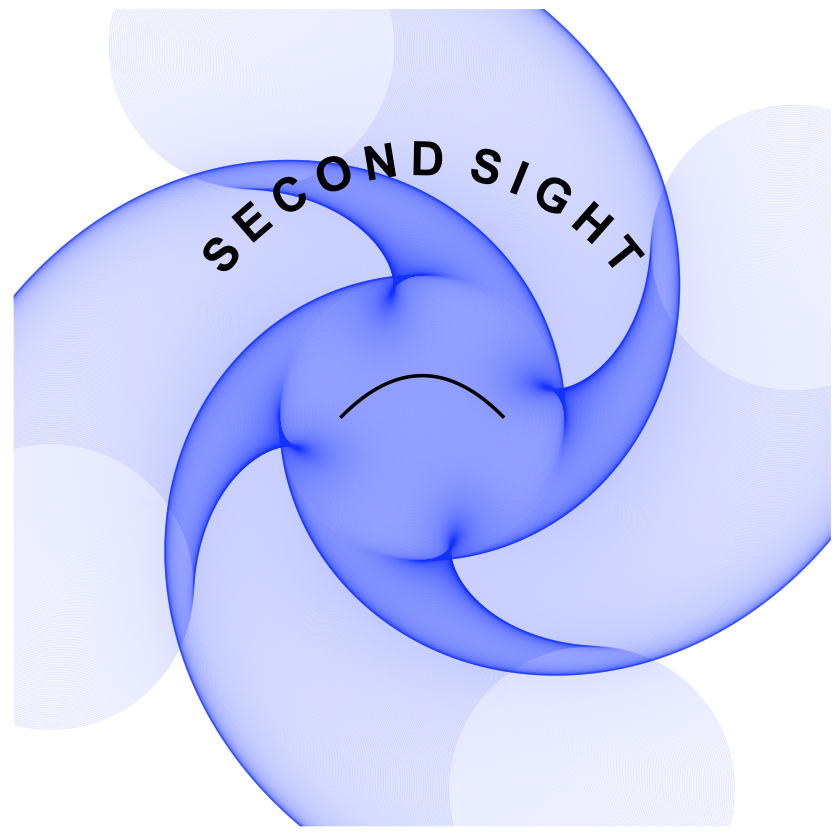

In [4]:
# Make a scatter plot of points in a spiral
plt <- ggplot() +
    # Points layer 1 using spiral dataframe
    geom_point(data = spiral, aes(x_spiral*t, y_spiral*t), 
               size = 80, alpha = 0.1, shape = 1, color = "#1c51ff") + 
    # Remove axes, labels, etc.
    remove_axes +
    # Parabola layer
    geom_path(data = parabola, aes(x_par, y_par),
              linewidth = 1) +
    # Curved text layer using half-circle dataframe
    geom_textpath(data = circle, aes(x_circle, y_circle), 
                  size = 10, label = "S E C O N D  S I G H T", 
                  text_only = TRUE, fontface = "bold")

plt